In [1]:
# import dependancies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import AveragePooling2D,Conv2D,Dropout,Flatten,Rescaling,Dense,Resizing
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import load_model
# import pretrained model
from keras.applications import VGG19,Xception,MobileNet,ResNet50,InceptionResNetV2,InceptionV3

In [92]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    rotation_range=30,
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [93]:
train_genarator = train_datagen.flow_from_directory(
    './emirhan_human_dataset/datasets/human_data/train_data',
    target_size=(225,225),
    batch_size=16,
    class_mode='categorical'
                                                    )
test_genarator = test_datagen.flow_from_directory(
    './emirhan_human_dataset/datasets/human_data/test_data',
    target_size=(225,225),
    batch_size=16,
    class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [94]:
pre_layer = InceptionV3(include_top=False,
                        input_shape=(225,225,3),
                        weights='imagenet')

In [95]:
for layer in pre_layer.layers:
    layer.trainable = False

In [ ]:
for layer in pre_layer.layers[-15:]:
    if 'conv' in layer.name:
        layer.trainable=True
    else:
        l
  

In [97]:
pre_layer.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 225, 225, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_752 (Conv2D)            (None, 112, 112, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_752 (Batch  (None, 112, 112, 32  96         ['conv2d_752[0][0]']             
 Normalization)                 )                                                      

In [98]:
model = Sequential()

model.add(pre_layer)

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(15,activation='softmax'))

In [99]:
early_stopping = EarlyStopping(patience=8,verbose=1)

model_checkpoint = ModelCheckpoint(
    filepath='checkpoints/checkpoint_resnet50.model.keras',
    save_best_only=True,
    verbose=True
)


In [100]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [101]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 51200)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               6553728   
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)               

In [102]:

model.fit(
    train_genarator,
    batch_size=16,
    epochs=50,
    validation_data=test_genarator,
    callbacks=[early_stopping,model_checkpoint],
    steps_per_epoch=15000//16
)

Epoch 1/50
937/937 [==============================] - ETA: 0s - loss: 2.2820 - accuracy: 0.2781
Epoch 1: val_loss improved from inf to 1.83214, saving model to checkpoints\checkpoint_resnet50.model.keras
937/937 [==============================] - 139s 145ms/step - loss: 2.2820 - accuracy: 0.2781 - val_loss: 1.8321 - val_accuracy: 0.4157
Epoch 2/50
937/937 [==============================] - ETA: 0s - loss: 1.9366 - accuracy: 0.3546
Epoch 2: val_loss improved from 1.83214 to 1.65755, saving model to checkpoints\checkpoint_resnet50.model.keras
937/937 [==============================] - 112s 120ms/step - loss: 1.9366 - accuracy: 0.3546 - val_loss: 1.6575 - val_accuracy: 0.4597
Epoch 3/50
937/937 [==============================] - ETA: 0s - loss: 1.8043 - accuracy: 0.3952
Epoch 3: val_loss improved from 1.65755 to 1.58584, saving model to checkpoints\checkpoint_resnet50.model.keras
937/937 [==============================] - 112s 120ms/step - loss: 1.8043 - accuracy: 0.3952 - val_loss: 1.585

KeyboardInterrupt: 

In [2]:
model = load_model('./checkpoints/checkpoint.model.keras')

In [3]:
scale = Rescaling(1./255)
resize = Resizing(224,224)
def predict_image(image):

    # Read image and show

    img = plt.imread(image)
    plt.imshow(img)
    plt.show()
    
    # Preprocess image
    img = scale(img)
    img = resize(img)
    img = tf.reshape(img,(1,224,224,3))

    # prediction
    pred = model.predict(img)

    # Mapping indices to their respective class labels
    if np.argmax(pred) == 0:
        print('Calling')
    elif np.argmax(pred) == 1:
        print('Clapping')
    elif np.argmax(pred) == 2:
        print('Cycling')
    elif np.argmax(pred) == 3:
        print('Dancing')
    elif np.argmax(pred) == 4:
        print('Drinking')
    elif np.argmax(pred) == 5:
        print('Eating')
    elif np.argmax(pred) == 6:
        print('Fighting')
    elif np.argmax(pred) == 7:
        print('Hugging')
    elif np.argmax(pred) == 8:
        print('Laughing')
    elif np.argmax(pred) == 9:
        print('Listening to Music')
    elif np.argmax(pred) == 10:
        print('Running')
    elif np.argmax(pred) == 11:
        print('Sitting')
    elif np.argmax(pred) == 12:
        print('Sleeping')
    elif np.argmax(pred) == 13:
        print('Texting')
    elif np.argmax(pred) == 14:
        print('Using Laptop')
    
    # Return the predicted class index and prediction array
    return np.argmax(pred)
    

In [4]:
# Testing data from internet

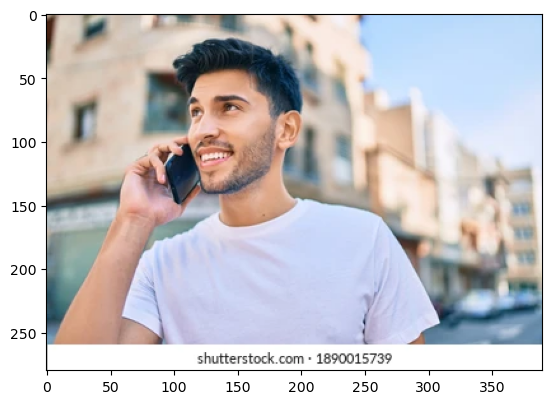

1/1 [==============================] - 0s 31ms/step
Calling


0

In [28]:
predict_image("C:/Users/VICTUS/Downloads/call1.webp")

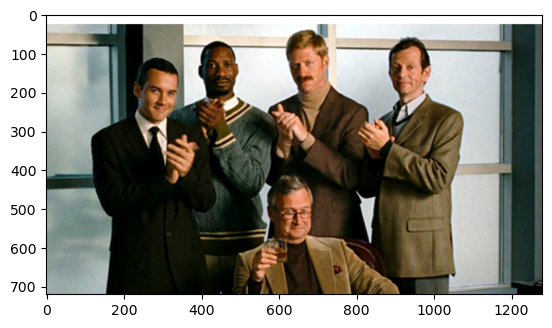

1/1 [==============================] - 0s 48ms/step
Clapping


1

In [29]:
predict_image("C:/Users/VICTUS/Downloads/clapp.jpg")


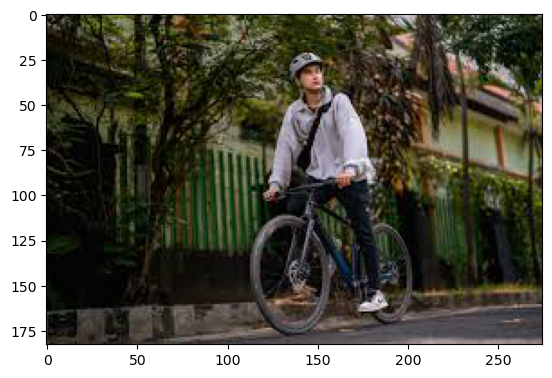

1/1 [==============================] - 0s 41ms/step
Cycling


2

In [30]:
predict_image("C:/Users/VICTUS/Downloads/cyy.jpeg")

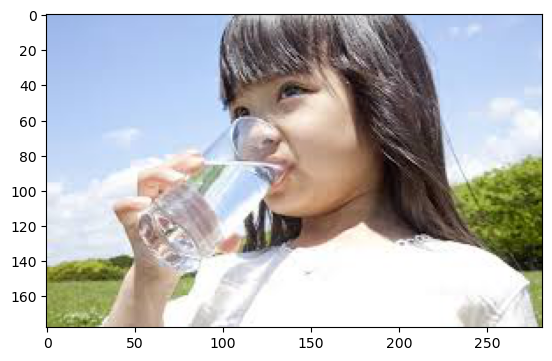

1/1 [==============================] - 0s 26ms/step
Drinking


4

In [8]:
predict_image("C:/Users/VICTUS/Downloads/test_image_dr.jpeg")

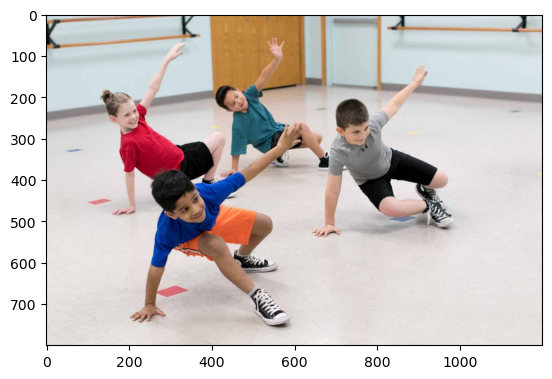

1/1 [==============================] - 0s 33ms/step
Dancing


3

In [9]:
predict_image("C:/Users/VICTUS/Downloads/image_test.jpg")

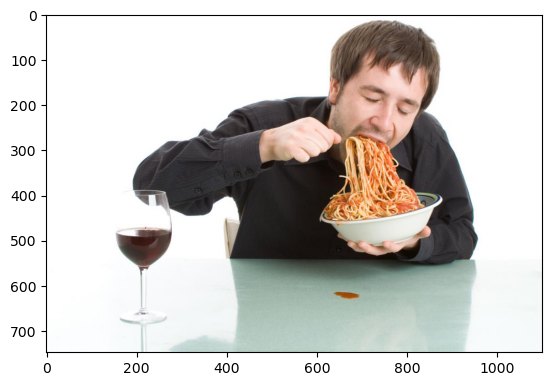

1/1 [==============================] - 0s 49ms/step
Eating


5

In [10]:
predict_image("C:/Users/VICTUS/Downloads/eating.jpg")

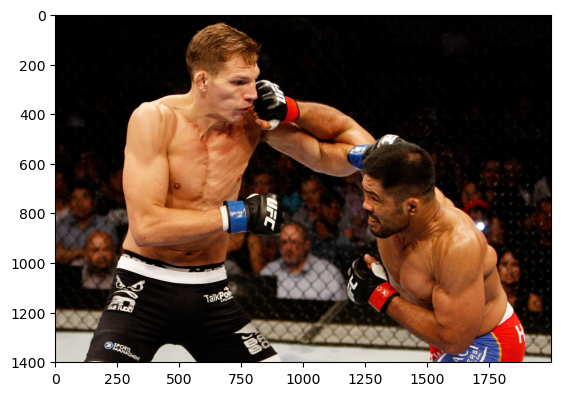

1/1 [==============================] - 0s 32ms/step
Fighting


6

In [11]:
predict_image("C:/Users/VICTUS/Downloads/fight.webp")

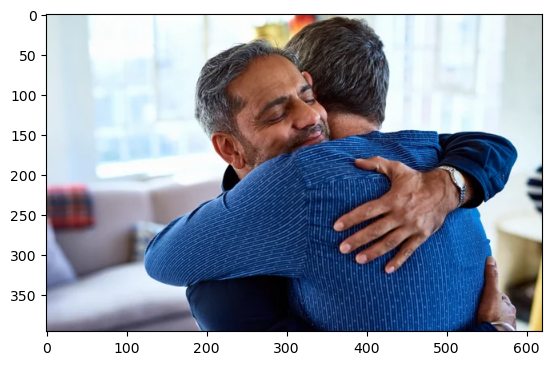

1/1 [==============================] - 0s 28ms/step
Hugging


7

In [12]:
predict_image("C:/Users/VICTUS/Downloads/hug.webp")

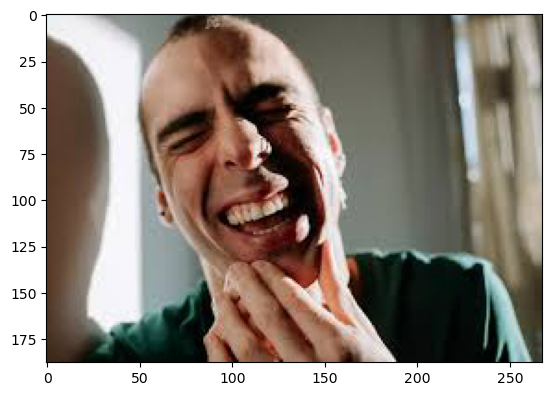

1/1 [==============================] - 0s 33ms/step
Laughing


8

In [13]:
predict_image("C:/Users/VICTUS/Downloads/laugh1.jpeg")

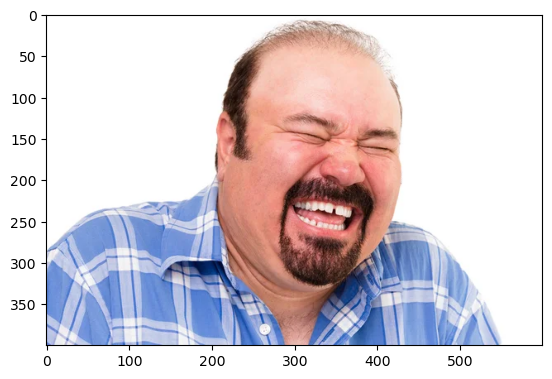

1/1 [==============================] - 0s 41ms/step
Laughing


8

In [14]:
predict_image("C:/Users/VICTUS/Downloads/lgh3.jpg")

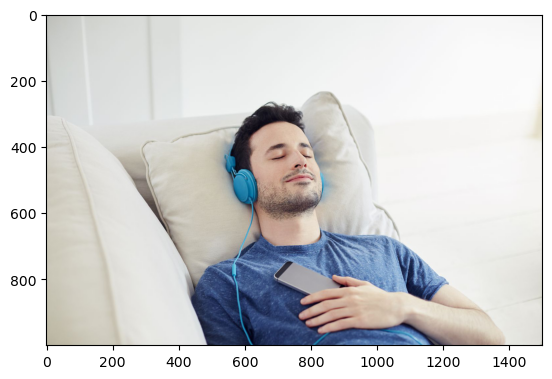

1/1 [==============================] - 0s 49ms/step
Listening to Music


9

In [15]:
predict_image("C:/Users/VICTUS/Downloads/lis.jpg")

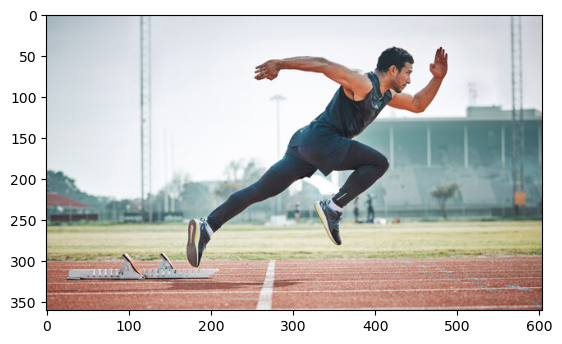

1/1 [==============================] - 0s 35ms/step
Running


10

In [16]:
predict_image("C:/Users/VICTUS/Downloads/runn.jpg")

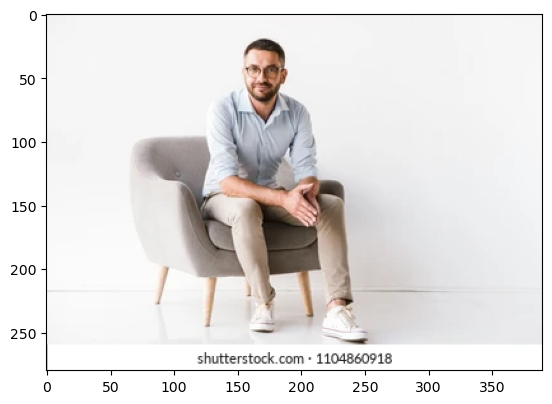

1/1 [==============================] - 0s 35ms/step
Sitting


11

In [17]:
predict_image("C:/Users/VICTUS/Downloads/sit2.webp")

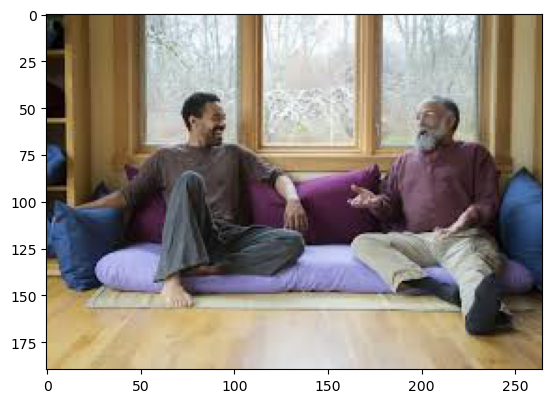

1/1 [==============================] - 0s 24ms/step
Sitting


11

In [18]:
predict_image("C:/Users/VICTUS/Downloads/sitt.jpeg")

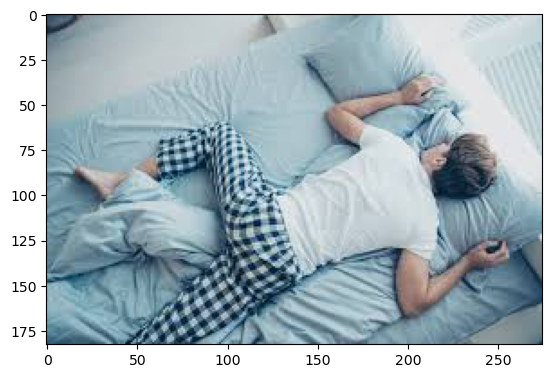

1/1 [==============================] - 0s 31ms/step
Sleeping


12

In [19]:
predict_image("C:/Users/VICTUS/Downloads/sleeping.jpeg")

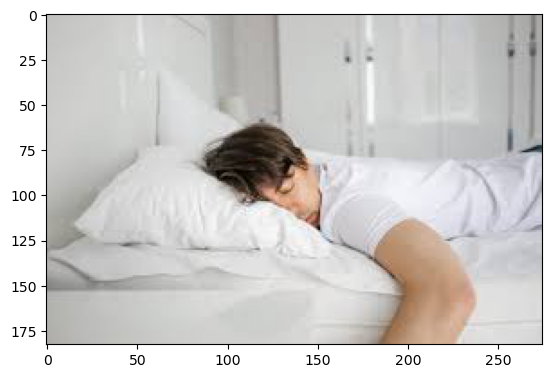

1/1 [==============================] - 0s 41ms/step
Sleeping


12

In [20]:
predict_image("C:/Users/VICTUS/Downloads/sleepings.jpeg")

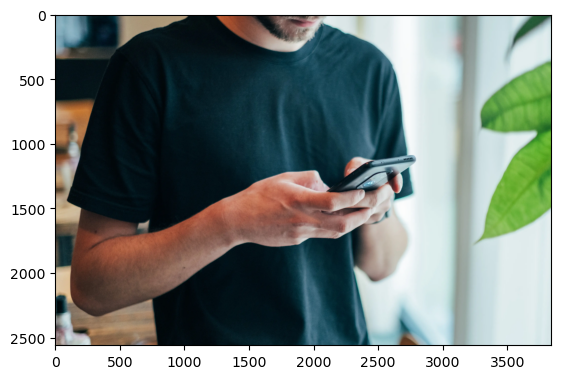

1/1 [==============================] - 0s 31ms/step
Texting


13

In [26]:
predict_image("C:/Users/VICTUS/Downloads/tes.webp")

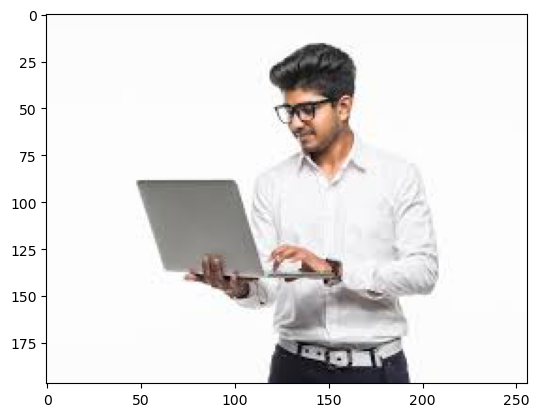

1/1 [==============================] - 0s 34ms/step
Using Laptop


14

In [23]:
predict_image("C:/Users/VICTUS/Downloads/lap.jpeg")

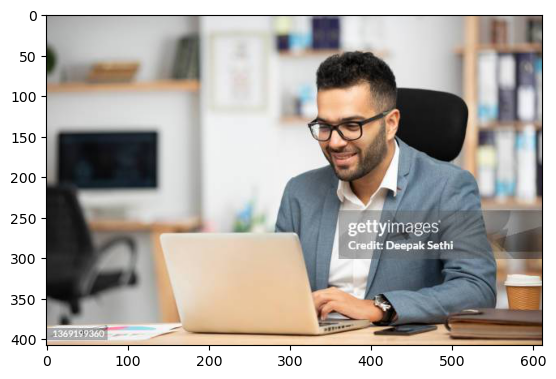

1/1 [==============================] - 0s 40ms/step
Using Laptop


14

In [24]:
predict_image("C:/Users/VICTUS/Downloads/lap1.jpg")